# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Чтобы можно было воспроизвести результаты")

Чтобы можно было воспроизвести результаты


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10).to_csv('sample.csv', index=False)

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
print(df_test.head(5))
print(df_test.tail(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
print(df_train.describe(include='all'))
print(df_test.describe(include='all'))

                          name         year  selling_price     km_driven  \
count                     6999  6999.000000   6.999000e+03  6.999000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       116          NaN            NaN           NaN   
mean                       NaN  2013.818403   6.395152e+05  6.958462e+04   
std                        NaN     4.053095   8.089419e+05  5.772400e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.700000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     6

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
empty_train_columns = df_train.isna().sum()
empty_test_columns = df_test.isna().sum()
print(empty_train_columns[empty_train_columns > 0])
print(empty_test_columns[empty_test_columns > 0])
print('В колонках mileage, engine, max_power, torque, seats есть пустые значения')


mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64
В колонках mileage, engine, max_power, torque, seats есть пустые значения


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
df_train_without_price = df_train.drop(['selling_price'], axis=1)
duplicates = df_train_without_price.duplicated(keep=False)

print(duplicates[duplicates == True])

22      True
26      True
27      True
28      True
29      True
        ... 
6981    True
6984    True
6989    True
6997    True
6998    True
Length: 1799, dtype: bool


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
duplicated_indexes = duplicates[duplicates == True].keys()
df_train.iloc[duplicated_indexes]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train = df_train.drop_duplicates(subset=df_train_without_price.columns, keep='first')

In [12]:
# assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace=True)


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
import re
regexp = r'\d+\.?\,?\d*'
newton_to_kg = 9.80665
def string_to_float(s):
    return float(s.replace(',', ''))

def extract_float(df_string):
    if pd.isna(df_string):
        return df_string
    findings = re.findall(regexp, df_string)    
    return string_to_float(findings[0]) if len(findings) != 0  else None

def extract_torque(string):
    if pd.isna(string):
        return string, string
    findings = re.findall(regexp, string)
    if re.search(r'kg|Kg|KG', string):
        return string_to_float(findings[0]) * newton_to_kg, string_to_float(findings[-1])
    return string_to_float(findings[0]), string_to_float(findings[-1])

def cast_torque_and_max_torque_rpm(df):
    new_columns = pd.DataFrame(df['torque'].apply(extract_torque).tolist(), columns=['torque', 'max_torque_rpm'])
    df['torque'] = new_columns['torque']
    df['max_torque_rpm'] = new_columns['max_torque_rpm']

def cast_columns(df):
    for column in ['mileage', 'engine', 'max_power']:
        df[column] = df[column].apply(extract_float)
    # df = df.drop(['torque'], axis=1)
    cast_torque_and_max_torque_rpm(df)
    return df
df_train = cast_columns(df_train)
df_test = cast_columns(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [15]:
columns_to_fill = ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']
# columns_to_fill = ['mileage', 'engine', 'max_power', 'seats']

df_test[columns_to_fill] = df_test[columns_to_fill].fillna(df_test[columns_to_fill].mean())
df_train[columns_to_fill] = df_train[columns_to_fill].fillna(df_train[columns_to_fill].mean())



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [16]:
print("Потому что у нас всего несколько видов кузовов с разными количествами сидений")

Потому что у нас всего несколько видов кузовов с разными количествами сидений


In [17]:
def cast_to_int(df):
    col = ['seats', 'engine']
    df[col] = df[col].astype(int)
    return df
df_test = cast_to_int(df_test)
df_train = cast_to_int(df_train)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

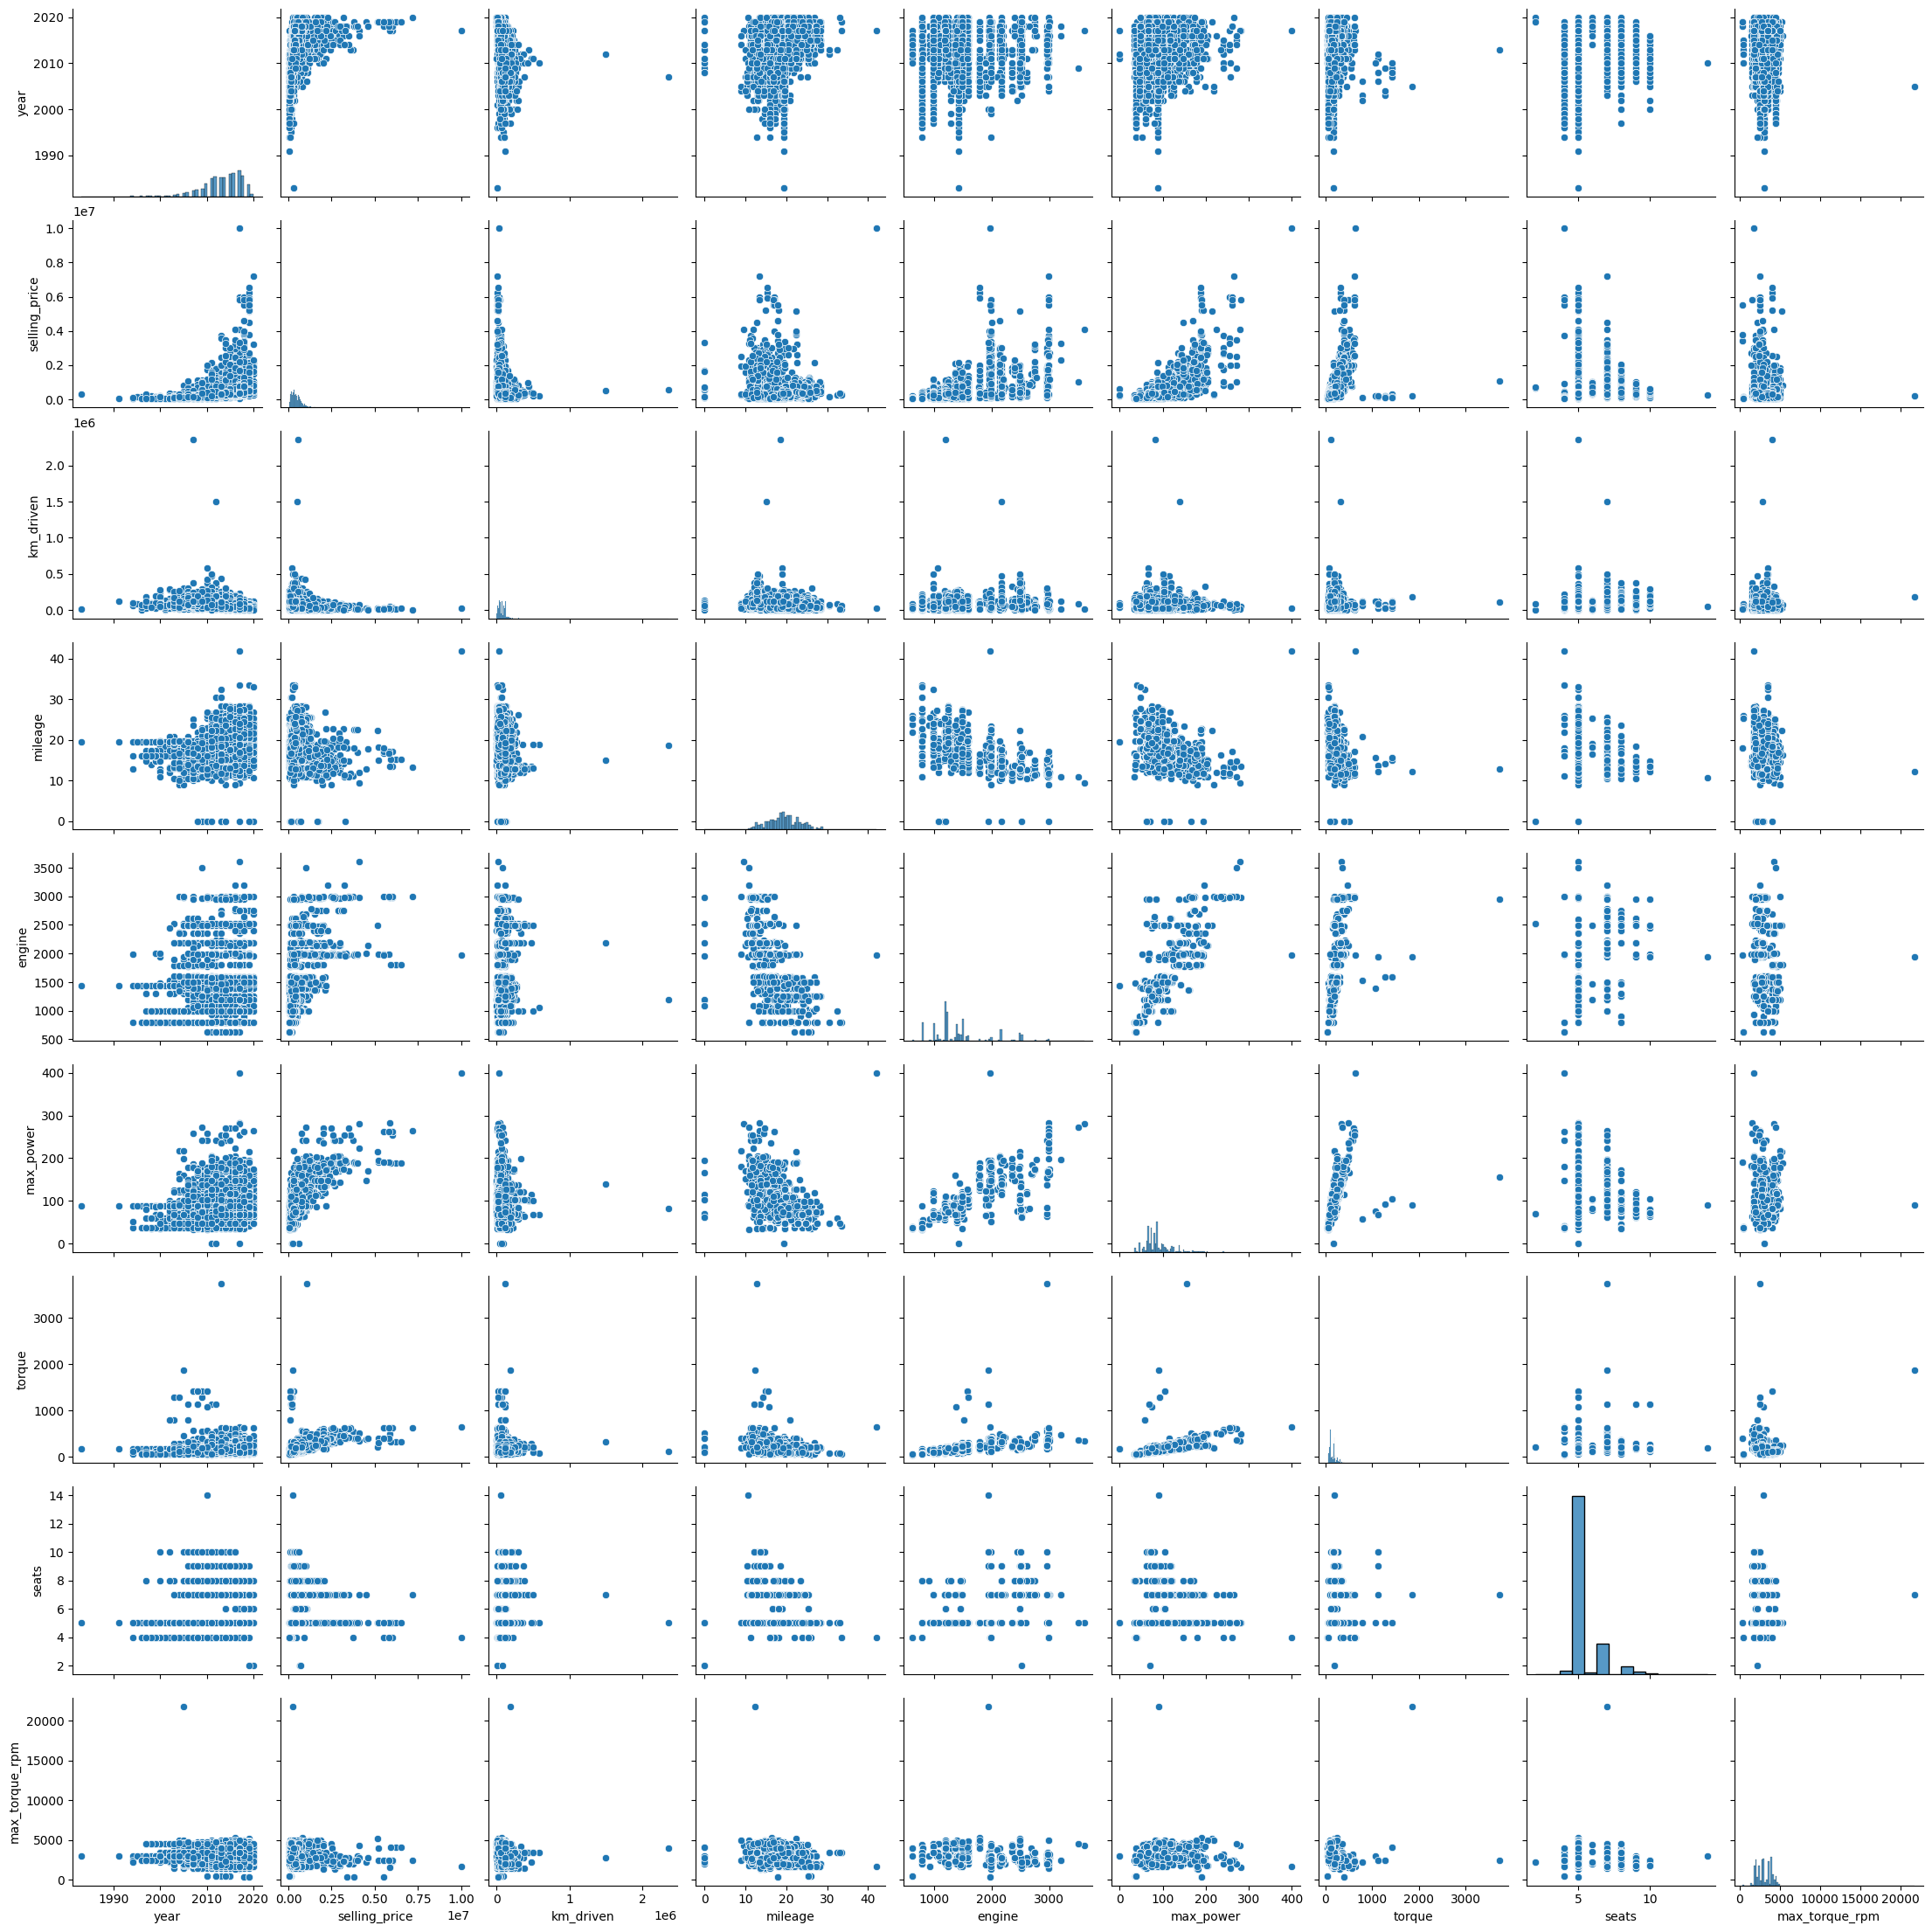

In [18]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Отлично коррелируют max_power и объем engine и torque
Да совокупности оказались похожими


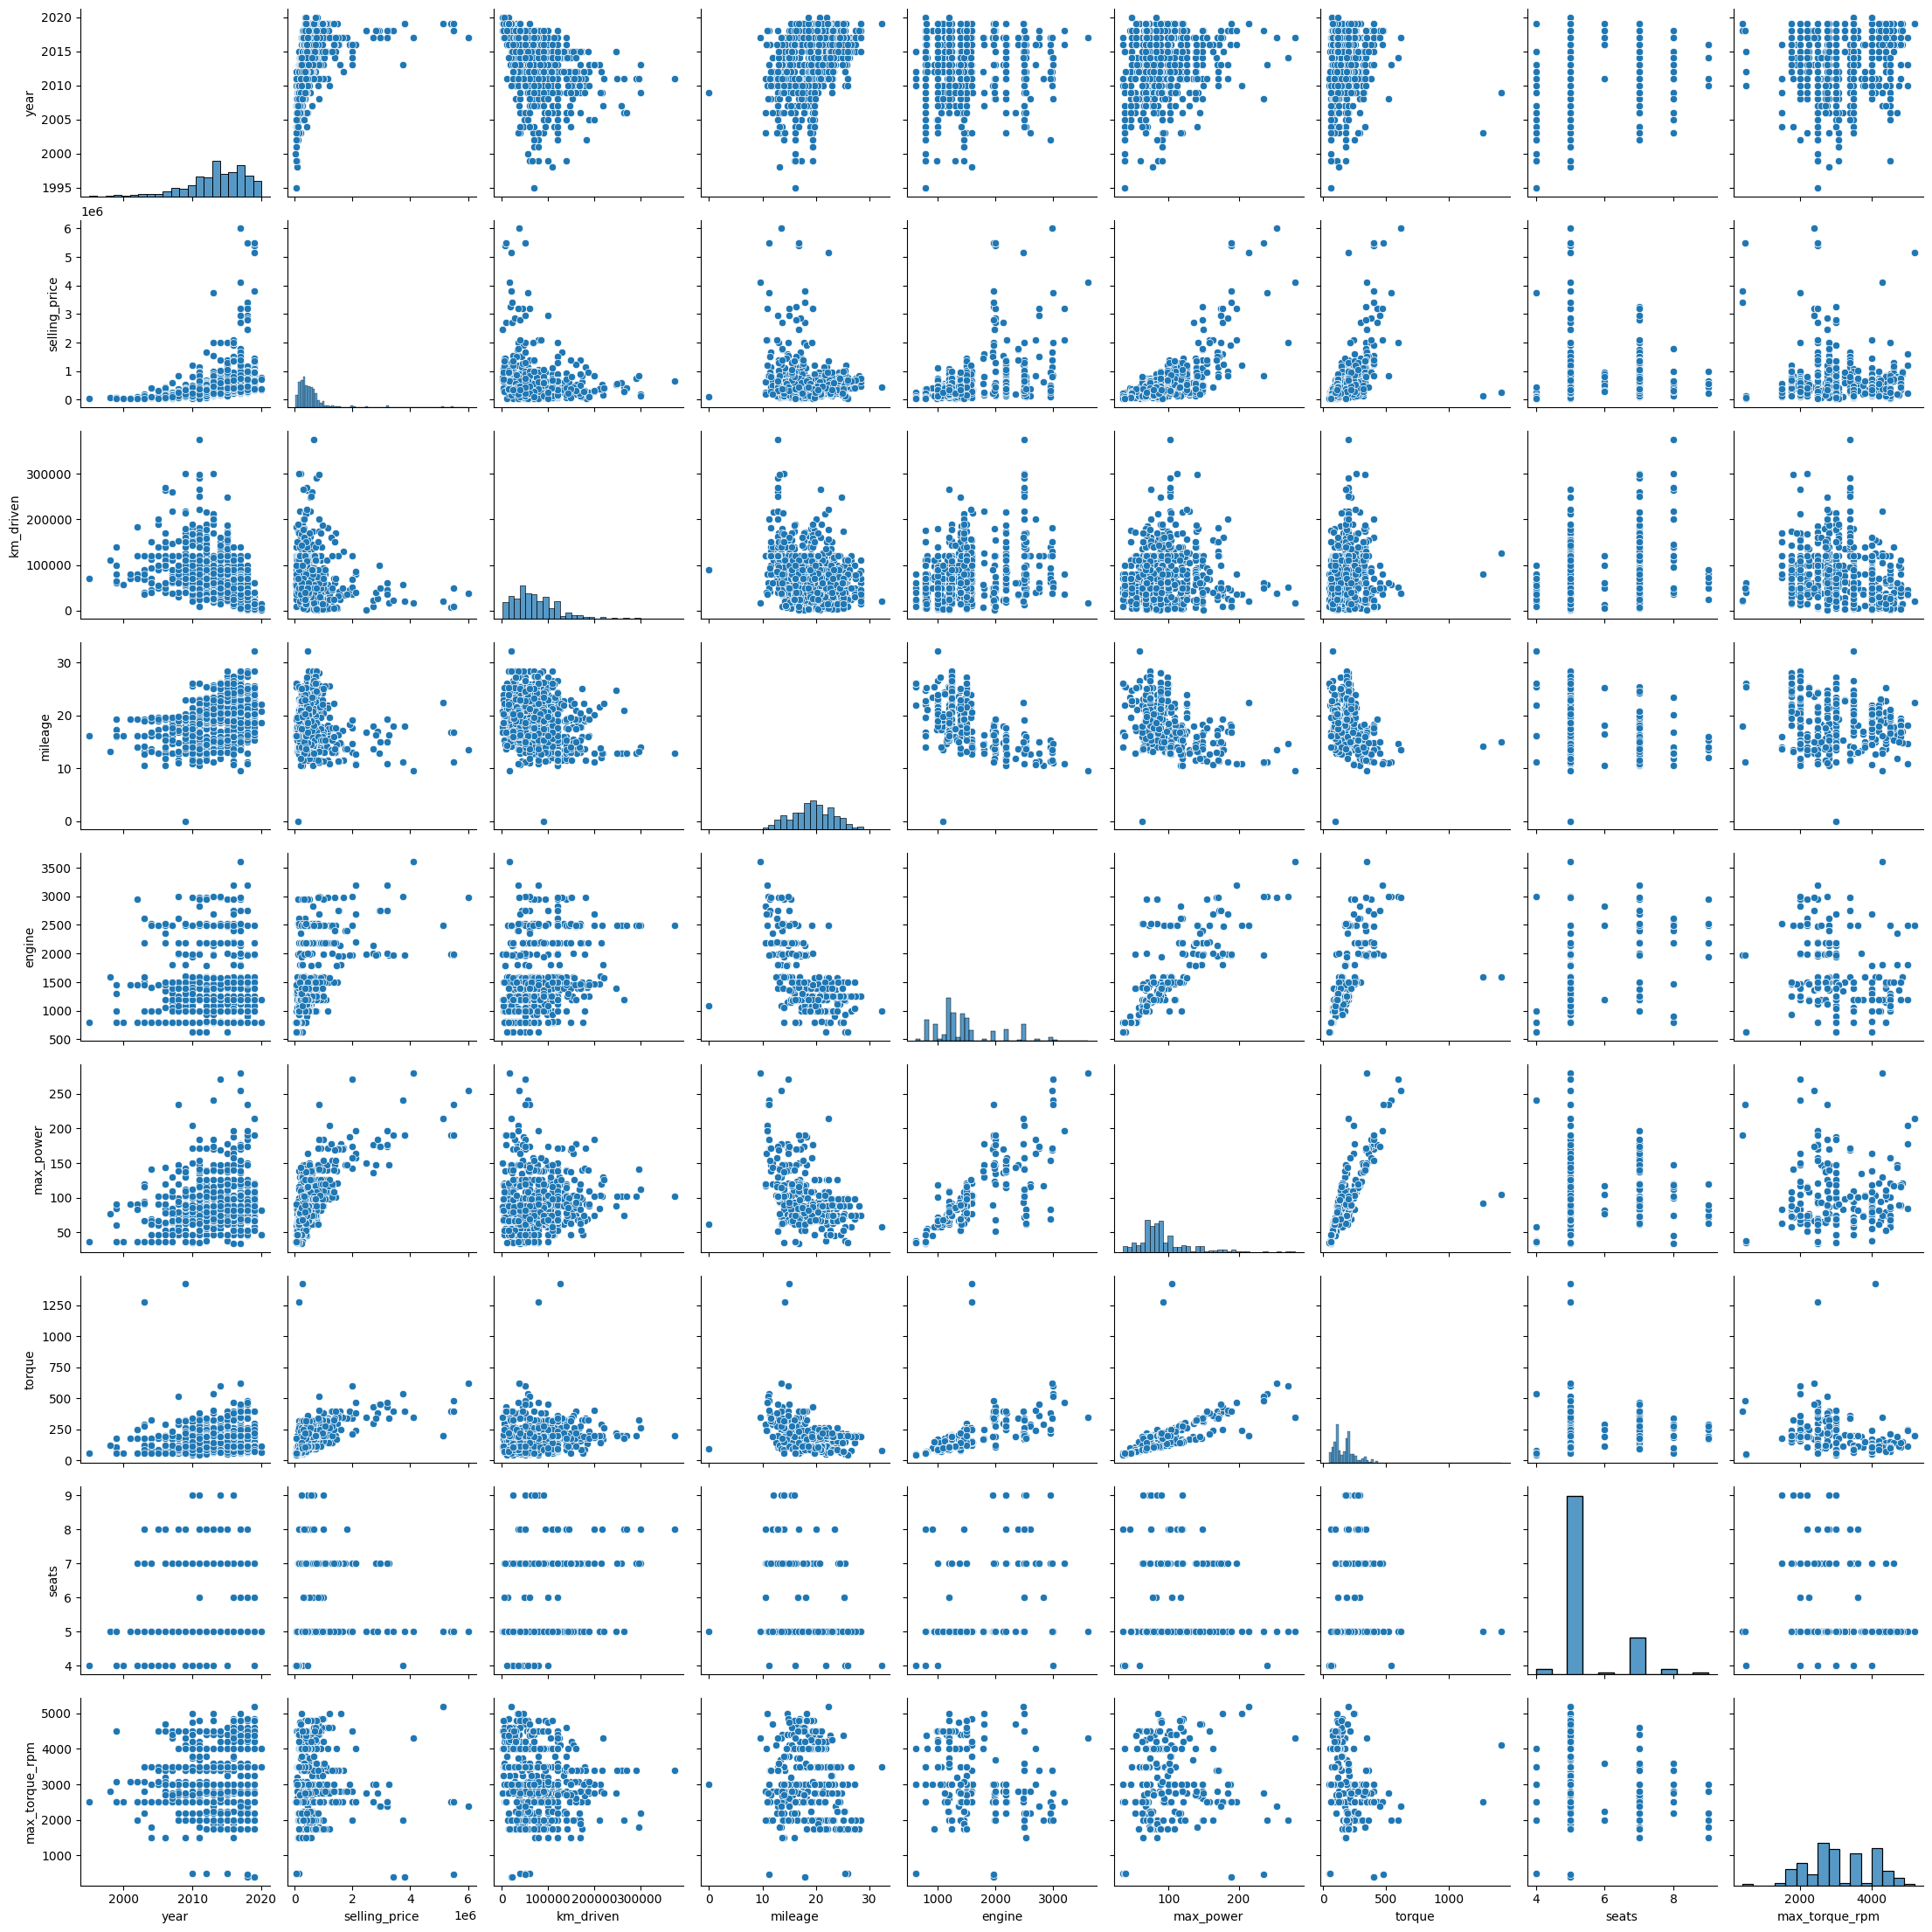

In [19]:
sns.pairplot(df_test)
print('Отлично коррелируют max_power и объем engine и torque')
print('Да совокупности оказались похожими')

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

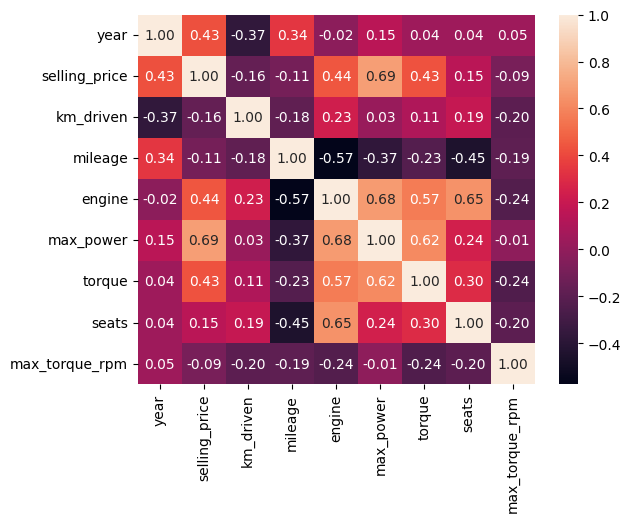

In [20]:
sns.heatmap(df_train.select_dtypes(include=['int', 'float']).corr(), annot=True, fmt='.2f')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

1. Engine и year практически не коррелируют
2. torque и max_power наблюдается довольно сильная положительная линейная зависимоть
3. Да верно так как наблюдается обратная корреляция пусть и довольно слабая
Максимальная корреляция между selling_price и max_power равна 0.6897431132458126


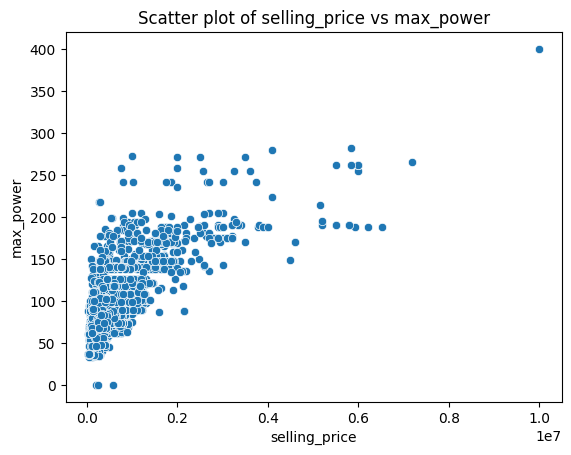

In [21]:
print('1. Engine и year практически не коррелируют')
print('2. torque и max_power наблюдается довольно сильная положительная линейная зависимоть')
print('3. Да верно так как наблюдается обратная корреляция пусть и довольно слабая')

correlation_matrix = df_train.select_dtypes(include=['int', 'float']).corr()
max_corr = correlation_matrix.replace(1, np.nan).unstack().dropna().nlargest(1)
feature1, feature2 = max_corr.index[0]
print(f'Максимальная корреляция между {feature1} и {feature2} равна {max_corr.values[0]}')

sns.scatterplot(data=df_train, x=feature1, y=feature2)
plt.title(f"Scatter plot of {feature1} vs {feature2}")
plt.show()


### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Минимальная корреляция между mileage и engine равна -0.5744037218781017


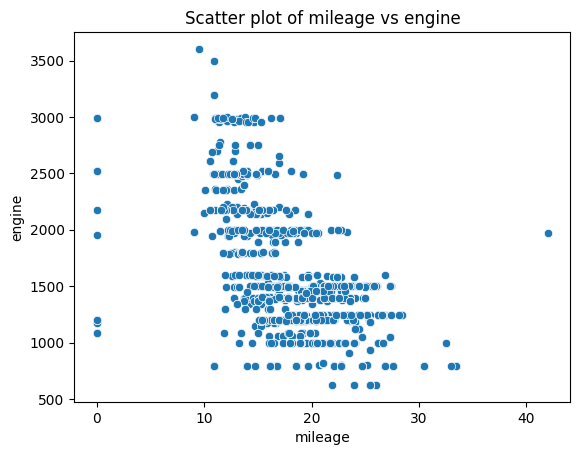

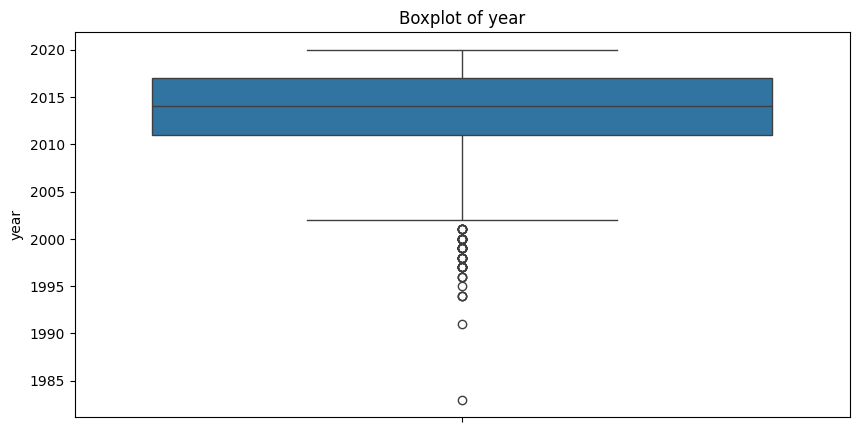

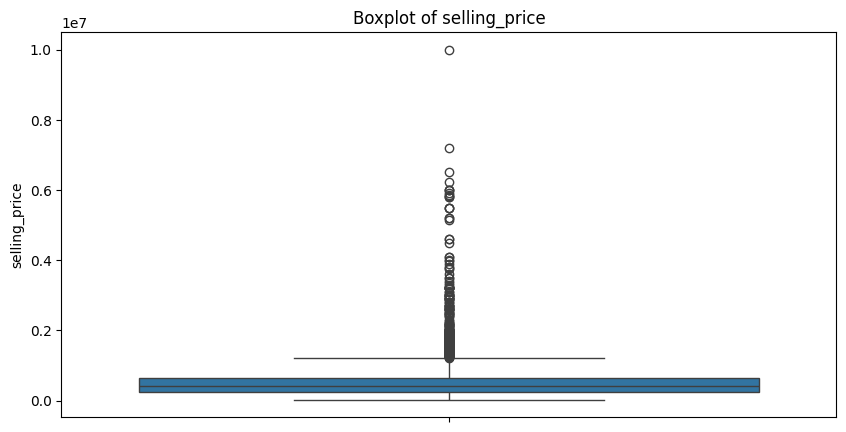

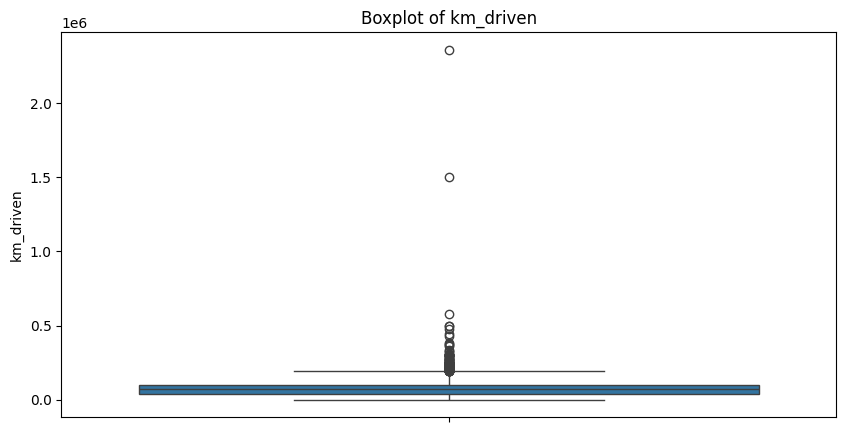

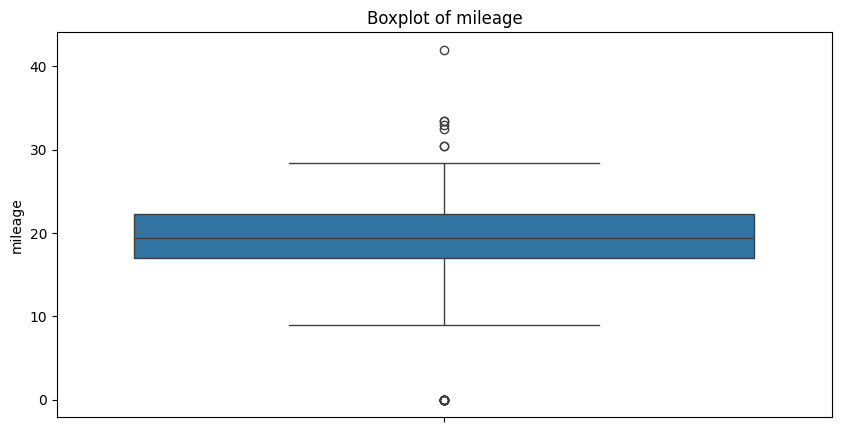

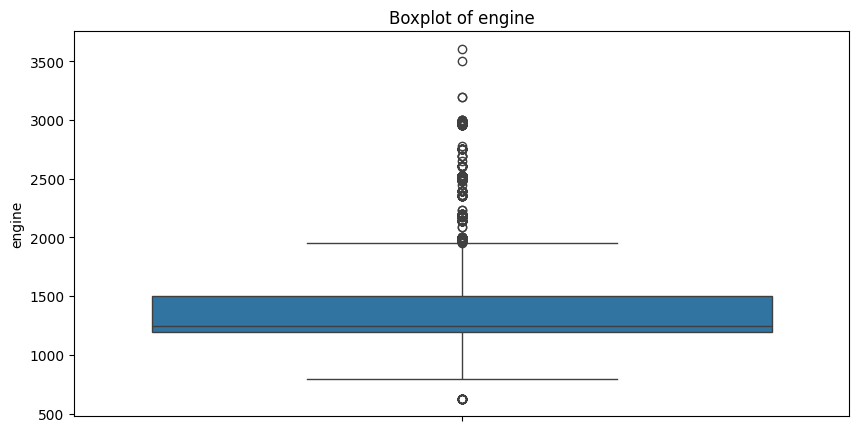

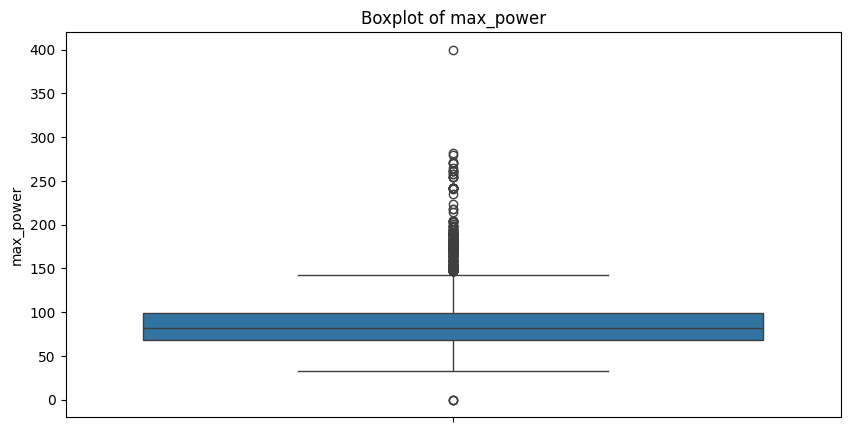

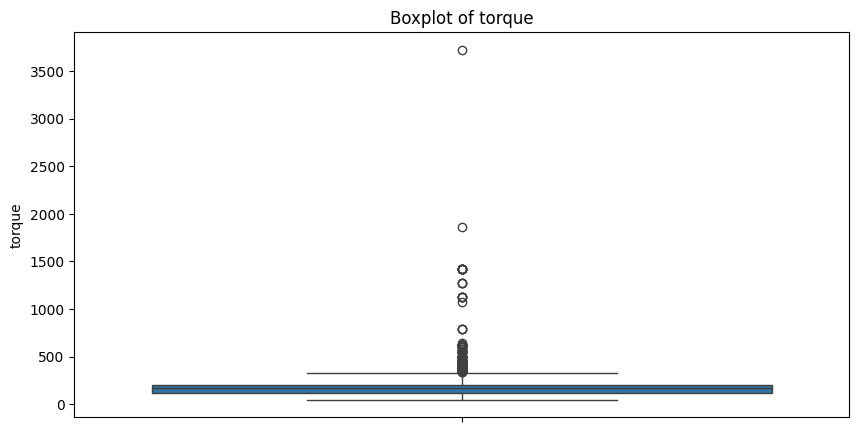

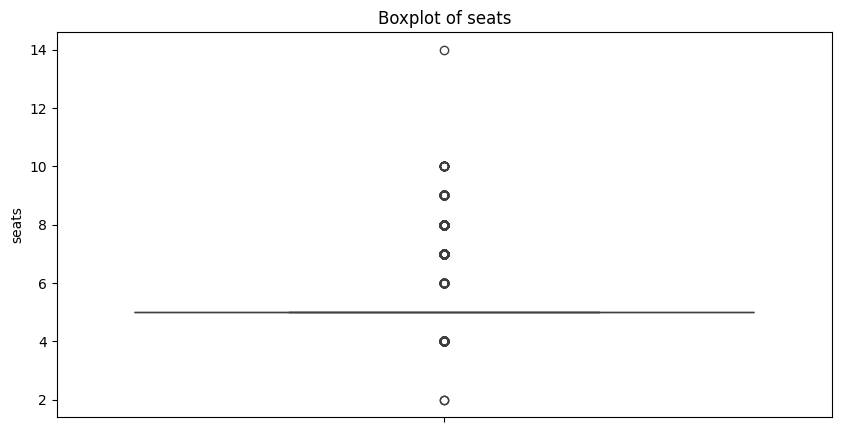

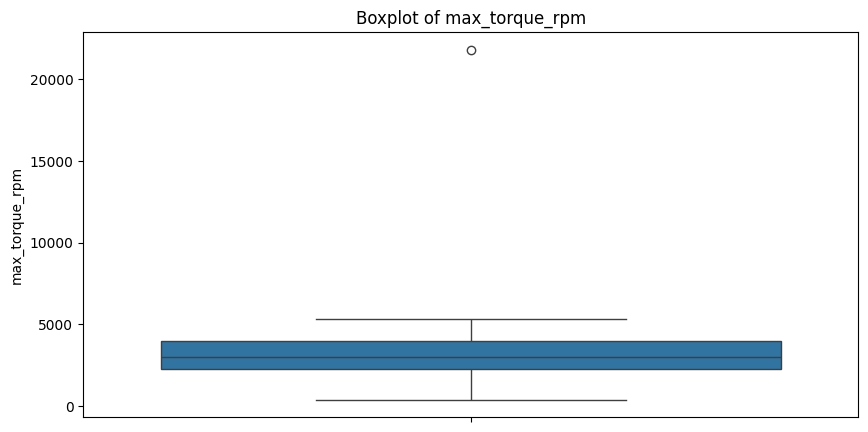

In [22]:
min_corr = correlation_matrix.replace(1, np.nan).unstack().dropna().nsmallest(1)
feature1, feature2 = min_corr.index[0]
print(f'Минимальная корреляция между {feature1} и {feature2} равна {min_corr.values[0]}')
sns.scatterplot(data=df_train, x=feature1, y=feature2)
plt.title(f"Scatter plot of {feature1} vs {feature2}")
plt.show()


# Можно посмотреть выбросы в данных используя для этого boxplot
for column in df_train.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_train[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [23]:
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=['int', 'float']).drop(['selling_price'], axis=1)
print(X_train.head(5))

   year  km_driven  mileage  engine  max_power      torque  seats  \
0  2014     145500    23.40    1248      74.00  190.000000      5   
1  2014     120000    21.14    1498     103.52  250.000000      5   
2  2010     127000    23.00    1396      90.00  219.668960      5   
3  2007     120000    16.10    1298      88.20  112.776475      5   
4  2017      45000    20.14    1197      81.86  113.750000      5   

   max_torque_rpm  
0          2000.0  
1          2500.0  
2          2750.0  
3          4500.0  
4          4000.0  


In [24]:
# assert X_train.shape == (5840, 6)

In [25]:
y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=['int', 'float']).drop(['selling_price'], axis=1)

In [26]:
# assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
MSE_score = MSE(y_test, model_predictions)
print(f'MSE score: {MSE_score}')
r2_model_score = r2_score(y_test, model_predictions)
print(f'R2 score: {r2_model_score}')

MSE score: 226815529918.79376
R2 score: 0.6054205594103155


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
model_predictions = model.predict(X_test_scaled)
MSE_score = MSE(y_test, model_predictions)
print(f'MSE score: {MSE_score}')
r2_model_score = r2_score(y_test, model_predictions)
print(f'R2 score: {r2_model_score}')

MSE score: 226815529918.79343
R2 score: 0.6054205594103159


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [29]:
print(X_test.columns)
print(model.coef_)
print('Как видно из коэффициентов модели, наибольшее влияние на цену оказывает год выпуска')

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')
[170965.01007473 -48460.24477019 -13000.53929565  20459.74951969
 330538.31825389   3920.17124869 -30283.43323126 -64879.73630073]
Как видно из коэффициентов модели, наибольшее влияние на цену оказывает год выпуска


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_predictions = lasso.predict(X_test_scaled)
MSE_score = MSE(y_test, lasso_predictions)
print(f'MSE score: {MSE_score}')
r2_lasso_score = r2_score(y_test, lasso_predictions)
print(f'R2 score: {r2_lasso_score}')

MSE score: 226816341337.74872
R2 score: 0.6054191478260318


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [31]:
print(lasso.coef_)

[170962.78339994 -48459.31439619 -12997.26422862  20457.6756225
 330539.71438229   3919.53347106 -30279.44741448 -64877.67643429]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [32]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': np.arange(0.1, 1, 0.05)}
grid = GridSearchCV(lasso, params, cv=10, scoring='r2')
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_

predictions = best_model.predict(X_test_scaled)
MSE_score = MSE(y_test, pd.DataFrame(predictions))
print(f'MSE score: {MSE_score}')
r2_lasso_score = r2_score(y_test, predictions)
print(f'R2 score: {r2_lasso_score}')
print(grid.best_params_)


MSE score: 226816300659.8835
R2 score: 0.6054192185912448
{'alpha': 0.9500000000000003}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [33]:
print('10 моделей с разными параметрами регуляризации которых было 10 штук итого 100 моделей')
print(grid.best_estimator_.coef_)
print('Нет ничего не занулилось при такой регуляризации')

10 моделей с разными параметрами регуляризации которых было 10 штук итого 100 моделей
[170962.89737226 -48459.36019658 -12997.43281955  20457.77502301
 330539.64511006   3919.56557466 -30279.64709528 -64877.78134536]
Нет ничего не занулилось при такой регуляризации


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [34]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
params = {'alpha': np.arange(0.1, 1, 0.05), 'l1_ratio': np.arange(0.1, 1, 0.05)}
grid = GridSearchCV(elastic_net, params, cv=10, scoring='r2')
grid.fit(X_train_scaled , y_train)
best_model = grid.best_estimator_
predictions = best_model.predict(X_test_scaled)
MSE_score = MSE(y_test, pd.DataFrame(predictions))
print(f'MSE score: {MSE_score}')
r2_lasso_score = r2_score(y_test, predictions)
print(f'R2 score: {r2_lasso_score}')



MSE score: 241425467064.42398
R2 score: 0.5800043948820877


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [35]:
print(grid.best_params_)

{'alpha': 0.7000000000000002, 'l1_ratio': 0.8500000000000002}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [36]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)
X_train_cat.head(5)

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.000000,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.000000,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,219.668960,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,112.776475,5,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.750000,5,4000.0


In [37]:
# assert X_train_cat.shape == (5840, 10)

In [38]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
encoder.fit(X_train_cat[columns])


# Преобразование обучающего набора
train_encoded = encoder.transform(X_train_cat[columns])

# Преобразование тестового набора
test_encoded = encoder.transform(X_test_cat[columns])

# Преобразование обратно в DataFrame
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(columns))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(columns))

train_encoded_df.head(5)
test_encoded_df.head(5)
def encode_onehot(df, columns):
    encoded = encoder.transform(df[columns])
    encoded_df =pd.DataFrame(encoded, columns=encoder.get_feature_names_out(columns))
    df = df.drop(columns, axis=1)
    df = pd.concat([encoded_df, df], axis=1)
    return df

columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

X_train_cat = encode_onehot(X_train_cat, columns)
X_test_cat = encode_onehot(X_test_cat, columns)

/Users/sprilut/workspace/hse/math/.conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': np.arange(0.1, 1, 0.05)}
grid = GridSearchCV(ridge, params, cv=10, scoring='r2')

grid.fit(X_train_scaled , y_train)
best_model = grid.best_estimator_
predictions = best_model.predict(X_test_scaled)

print(grid.best_params_)
MSE_score = MSE(y_test, predictions)
print(f'MSE score: {MSE_score}')
r2_score_model = r2_score(y_test, predictions)
print(f'R2 score: {r2_score_model}')


{'alpha': 0.9500000000000003}
MSE score: 208835177125.13602
R2 score: 0.6367000646076303


In [42]:
# сохранение весов модели, скейлера и энкодера
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [63]:

scaler = StandardScaler()



# new_df = df_train.copy()
# new_df['square_of_year'] = new_df['year'] ** 2
# print(new_df.head())
# sns.heatmap(new_df[['square_of_year', 'selling_price', 'year']].corr(), annot=True, fmt='.2f')

X_te = X_test_cat.copy()
df_train_copy = pd.concat([X_train_cat, y_train], axis=1)

def get_filtered_df(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

print(len(df_train_copy))

# df_train_copy = get_filtered_df(df_train_copy, 'mileage')
# df_train_copy = get_filtered_df(df_train_copy, 'year')
# df_train_copy = get_filtered_df(df_train_copy, 'km_driven')

y_tr = df_train_copy['selling_price']
X_tr = df_train_copy.drop(['selling_price'], axis=1)


X_tr['square_of_year'] = X_tr['year'] ** 2
X_te['square_of_year'] = X_te['year'] ** 2

X_tr['square_of_mileage'] = X_tr['mileage'] ** 2
X_te['square_of_mileage'] = X_te['mileage'] ** 2
X_tr['max_power'] = X_tr['max_power'] ** 2
X_te['max_power'] = X_te['max_power'] ** 2
X_tr['torque'] = X_tr['torque'] ** 2
X_te['torque'] = X_te['torque'] ** 2

# X_tr.replace([np.inf, -np.inf], np.nan, inplace=True)
# X_te.replace([np.inf, -np.inf], np.nan, inplace=True)

# X_tr.fillna(X_tr.mean(), inplace=True)
# X_te.fillna(X_te.mean(), inplace=True)

X_train_scaled = scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_te)

ridge = Ridge()
params = {'alpha': np.arange(0.1, 1, 0.05)}
grid = GridSearchCV(ridge, params, cv=10, scoring='r2')

grid.fit(X_tr , y_tr)
best_model = grid.best_estimator_
predictions = best_model.predict(X_te)

print(grid.best_params_)
MSE_score = MSE(y_test, predictions)
print(f'MSE score: {MSE_score}')
r2_score_model = r2_score(y_test, predictions)
print(f'R2 score: {r2_score_model}')

5840
{'alpha': 0.1}
MSE score: 172234327730.96832
R2 score: 0.700372700622583


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [65]:
def business_metrics(y_true, y_pred):
    length = len(y_true)
    number_of_predict_more_than_ten_percent = 0;
    for i in range(length):
        if abs(y_pred[i] / y_true[i] - 1) > 0.1:
            number_of_predict_more_than_ten_percent += 1
    return number_of_predict_more_than_ten_percent / length * 100

print(business_metrics(y_test, predictions))

76.8


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link